## 0 读取数据

我选择的是 `college` 这个数据集。该数据集包含摘自《美国新闻与世界报道》1995年刊的美国高校统计数据: 

| 数据域名称 | 含义 |
|-----|-----|
| `Private` | 二分变量，以"No"和"Yes"标识私立或公立大学   |
| `Apps` | 收到的申请数量   |
| `Accept` | 录取的申请数量   |
| `Enroll` | 入学新生数量   |
| `Top10perc` | 高中排名前10%的新生百分比   |
| `Top25perc` | 高中排名前25%的新生百分比   |
| `F.Undergrad` | 全日制本科学生人数   |
| `P.Undergrad` | 非全日制本科学生人数   |
| `Outstate` | 外州学生学费   |
| `Room.Board` | 食宿费用   |
| `Books` | 预估书本费用   |
| `Personal` | 预估个人开销   |
| `PhD` | 拥有博士学位的教师比例   |
| `Terminal` | 拥有最高学位的教师比例   |
| `S.F.Ratio` | 师生比例   |
| `perc.alumni` | 捐赠校友比例   |
| `Expend` | 生均教学支出   |
| `Grad.Rate` | 毕业率 |

我们希望了解其他特征域的值对毕业率的影响。

In [84]:
import pandas as pd # type: ignoreselect
college = pd.read_csv('college.csv')

In [85]:
college.head()

Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0   70        78       18.1           12    7041         60  
1   29        30       12.2           16   10527         56  
2   53        66       12.9           30    8735         54  
3   92        97        7.7           37   19016         59  
4   76        72       11.9            2   10922         15

将第一列的列明改为 `College`

In [86]:
college.rename({'Unnamed: 0': 'College'}, axis=1, inplace=True)
college.set_index('College', inplace=True)
college.head()

Private  Apps  Accept  Enroll  Top10perc  \
College                                                                 
Abilene Christian University     Yes  1660    1232     721         23   
Adelphi University               Yes  2186    1924     512         16   
Adrian College                   Yes  1428    1097     336         22   
Agnes Scott College              Yes   417     349     137         60   
Alaska Pacific University        Yes   193     146      55         16   

                              Top25perc  F.Undergrad  P.Undergrad  Outstate  \
College                                                                       
Abilene Christian University         52         2885          537      7440   
Adelphi University                   29         2683         1227     12280   
Adrian College                       50         1036           99     11250   
Agnes Scott College                  89          510           63     12960   
Alaska Pacific University            44          249          869      7560   

                              Room.Board  Books  Personal  PhD  Terminal  \
College                                                                    
Abilene Christian University        3300    450      2200   70        78   
Adelphi University                  6450    750      1500   29        30   
Adrian College                      3750    400      1165   53        66   
Agnes Scott College                 5450    450       875   92        97   
Alaska Pacific University           4120    800      1500   76        72   

                              S.F.Ratio  perc.alumni  Expend  Grad.Rate  
College                                                                  
Abilene Christian University       18.1           12    7041         60  
Adelphi University                 12.2           16   10527         56  
Adrian College                     12.9           30    8735         54  
Agnes Scott College                 7.7           37   19016         59  
Alaska Pacific University          11.9            2   10922         15

将 `Private` 字段映射为 `bool` 值变量

In [87]:
college['Private'] = college['Private'].map({'Yes': 1, 'No': 0})
college.head()

Private  Apps  Accept  Enroll  Top10perc  \
College                                                                  
Abilene Christian University        1  1660    1232     721         23   
Adelphi University                  1  2186    1924     512         16   
Adrian College                      1  1428    1097     336         22   
Agnes Scott College                 1   417     349     137         60   
Alaska Pacific University           1   193     146      55         16   

                              Top25perc  F.Undergrad  P.Undergrad  Outstate  \
College                                                                       
Abilene Christian University         52         2885          537      7440   
Adelphi University                   29         2683         1227     12280   
Adrian College                       50         1036           99     11250   
Agnes Scott College                  89          510           63     12960   
Alaska Pacific University            44          249          869      7560   

                              Room.Board  Books  Personal  PhD  Terminal  \
College                                                                    
Abilene Christian University        3300    450      2200   70        78   
Adelphi University                  6450    750      1500   29        30   
Adrian College                      3750    400      1165   53        66   
Agnes Scott College                 5450    450       875   92        97   
Alaska Pacific University           4120    800      1500   76        72   

                              S.F.Ratio  perc.alumni  Expend  Grad.Rate  
College                                                                  
Abilene Christian University       18.1           12    7041         60  
Adelphi University                 12.2           16   10527         56  
Adrian College                     12.9           30    8735         54  
Agnes Scott College                 7.7           37   19016         59  
Alaska Pacific University          11.9            2   10922         15

使用 `DataFrame.describe()` 函数获取每个特征域的各统计量

In [88]:
college.describe(include= "all")

Private          Apps        Accept       Enroll   Top10perc  \
count  777.000000    777.000000    777.000000   777.000000  777.000000   
mean     0.727156   3001.638353   2018.804376   779.972973   27.558559   
std      0.445708   3870.201484   2451.113971   929.176190   17.640364   
min      0.000000     81.000000     72.000000    35.000000    1.000000   
25%      0.000000    776.000000    604.000000   242.000000   15.000000   
50%      1.000000   1558.000000   1110.000000   434.000000   23.000000   
75%      1.000000   3624.000000   2424.000000   902.000000   35.000000   
max      1.000000  48094.000000  26330.000000  6392.000000   96.000000   

        Top25perc   F.Undergrad   P.Undergrad      Outstate   Room.Board  \
count  777.000000    777.000000    777.000000    777.000000   777.000000   
mean    55.796654   3699.907336    855.298584  10440.669241  4357.526384   
std     19.804778   4850.420531   1522.431887   4023.016484  1096.696416   
min      9.000000    139.000000      1.000000   2340.000000  1780.000000   
25%     41.000000    992.000000     95.000000   7320.000000  3597.000000   
50%     54.000000   1707.000000    353.000000   9990.000000  4200.000000   
75%     69.000000   4005.000000    967.000000  12925.000000  5050.000000   
max    100.000000  31643.000000  21836.000000  21700.000000  8124.000000   

             Books     Personal         PhD    Terminal   S.F.Ratio  \
count   777.000000   777.000000  777.000000  777.000000  777.000000   
mean    549.380952  1340.642214   72.660232   79.702703   14.089704   
std     165.105360   677.071454   16.328155   14.722359    3.958349   
min      96.000000   250.000000    8.000000   24.000000    2.500000   
25%     470.000000   850.000000   62.000000   71.000000   11.500000   
50%     500.000000  1200.000000   75.000000   82.000000   13.600000   
75%     600.000000  1700.000000   85.000000   92.000000   16.500000   
max    2340.000000  6800.000000  103.000000  100.000000   39.800000   

       perc.alumni        Expend  Grad.Rate  
count   777.000000    777.000000  777.00000  
mean     22.743887   9660.171171   65.46332  
std      12.391801   5221.768440   17.17771  
min       0.000000   3186.000000   10.00000  
25%      13.000000   6751.000000   53.00000  
50%      21.000000   8377.000000   65.00000  
75%      31.000000  10830.000000   78.00000  
max      64.000000  56233.000000  118.00000

In [91]:
college.describe(include= "all").T

count          mean          std     min     25%     50%  \
Private      777.0      0.727156     0.445708     0.0     0.0     1.0   
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  
Private          1.0      1.0  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    118.0

## 1 探索性数据分析

下面对上述 `describe()` 的结果进行分析。

整体概述

这份数据描述了777所美国大学在1995年的各项指标。数据包含分类变量（如Private）和数值变量。describe()函数为数值变量提供了丰富的统计信息，让我们能够快速了解数据的中心趋势、离散程度和分布形态。

分变量详细分析

1. 学校基本属性

* Private
    * 分析： 这是一个分类变量，describe() 显示其唯一值（unique）为2（Yes/No），其中 top 值为 True（即"Yes"），频数（freq）为565。
    * 结论： 数据集中私立大学占绝大多数。565所私立大学 / 777所总数 ≈ 72.7% 的学校是私立的。

2. 招生情况

* Apps（申请数）， Accept（录取数）， Enroll（入学数）

    * 平均数： 平均每所大学收到3001份申请，录取2018人，最终有779人入学。

    * 统计行为：
        * 差异巨大： 三个变量的标准差（std）都非常大，几乎接近甚至超过其平均值（例如Apps的std=3870 > mean=3001）。这表明不同大学的招生规模存在天壤之别。最大值（Apps max=48,094）和最小值（Apps min=81）也印证了这一点。

        * 录取与入学率： 我们可以粗略计算：

            * 平均录取率 = Accept / Apps ≈ 2018 / 3001 ≈ 67.3%

            * 平均入学率/报到率 = Enroll / Accept ≈ 779 / 2018 ≈ 38.6%

        * 分布形态： 中位数（50%）远小于平均数（均值）。例如，Apps的中位数是1558，但均值是3001。这意味着有少量大学拥有极其庞大的申请量（极右偏分布），拉高了整体平均值。大部分大学的申请数集中在较低水平（一半的大学申请数少于1558）。

3. 生源质量

* Top10perc（高中前10%）， Top25perc（高中前25%）

    * 平均数： 平均而言，新生中有27.6%来自高中排名前10%的学生，55.8%来自前25%的学生。

    * 统计行为： 分布相对均匀（标准差小于均值），Top25perc的中位数（54%）和均值（55.8%）很接近，说明分布相对对称。而Top10perc的中位数（23%）低于均值（27.6%），表明存在一些顶尖生源高度集中的大学，使分布轻微右偏。

4. 学生与教师规模

* F.Undergrad（全日制本科）， P.Undergrad（非全日制本科）

    * 平均数： 平均全日制本科生为3699人，非全日制为855人。

    * 统计行为： 同样呈现出极大的差异（标准差很大）。全日制学生的规模分布极右偏（中位数1707 << 均值3699），说明少数大型大学主导了数据。非全日制学生的最大值（21,836）和标准差（1522）表明，不同大学在教学模式上差异显著。

* S.F.Ratio（师生比）

    * 平均数： 平均师生比为14.09（即平均每14名学生对应1名教师）。

    * 统计行为： 分布相对集中（标准差3.96），中位数（13.6）和均值（14.09）接近，大部分学校的师生比在11.5到16.5之间（25%-75%分位数）。

5. 费用与开支

* Outstate（外州学费）， Room.Board（食宿费）， Books（书本费）， Personal（个人开销）， Expend（生均支出）

    * 平均数： 外州学费平均为10,441，食宿费为4,358，书本费为549，个人开销为1,341，生均教学支出为$9,660。

    * 统计行为：

        * 学费和支出差异显著： Outstate和Expend的标准差非常大，表明大学的收费水平和资源投入相差悬殊。Expend的最大值（56,233）是均值（9,660）的5倍多，再次印证了资源的高度不平等。

        * 固定费用相对稳定： Room.Board和Books的分布相对集中，说明这些基础生活成本在不同大学间差异较小。

        * 分布形态： Outstate和Expend的分布明显右偏（中位数 < 均值），说明有一小部分高学费、高支出的精英大学。

6. 师资力量

* PhD（拥有博士学位教师比例）， Terminal（拥有终极学位教师比例）

    * 平均数： 平均72.7%的教师拥有博士学位，79.7%拥有终极学位（通常指本领域的最高学位，如博士、艺术硕士MFA等）。

    * 统计行为： 分布较为集中，大部分大学的教师博士学位比例在62%到85%之间（25%-75%分位数），师资队伍整体素质较高且在不同大学间相对均衡。Terminal的比例普遍高于PhD，这是合理的。

7. 学校成果与声誉

* perc.alumni（捐赠校友比例）

    * 平均数： 平均22.7%的校友会捐款。

    * 统计行为： 分布较为分散，不同大学的校友捐赠文化和忠诚度差异很大。

* Grad.Rate（毕业率）

    * 平均数： 平均毕业率为65.5%。

    * 统计行为：

        * 异常值： 最大值118%是一个明显的异常值，因为毕业率不可能超过100%。这可能是数据录入错误，或者计算方法特殊（例如包含了超期毕业的学生），需要进一步核查。

        * 分布： 剔除异常值影响，毕业率的分布相对正常，中位数（65%）与均值（65.5%）基本一致，表明分布大致对称。但毕业率本身在不同大学间差异不小（标准差17.2%）。

总结

1.  数据构成： 数据集以私立大学为主（72.7%）。
2.  极度不均衡： 大学在规模（申请数、学生人数）和资源（学费、支出）上表现出极端的差异，存在明显的“头部效应”。大部分统计量的平均值都被少数大型/富裕的大学拉高，中位数通常能更好地代表“典型”大学的情况。
3.  招生漏斗： 从申请到录取再到入学，数量大幅减少，平均入学率仅为38.6%。
4.  潜在数据问题： Grad.Rate存在超过100%的异常值，需要在后续分析中处理。
5.  相对稳定的指标： 师生比（S.F.Ratio）、师资博士比例（PhD, Terminal）、基础生活成本（Room.Board, Books）等指标在不同大学间的分布相对集中。

(d) Use the `pd.plotting.scatter_matrix()` function to produce a
scatterplot matrix of the frst columns `[Top10perc, Apps, Enroll]`.
Recall that you can reference a list `C` of columns of a data frame
`A` using `A[C]`.

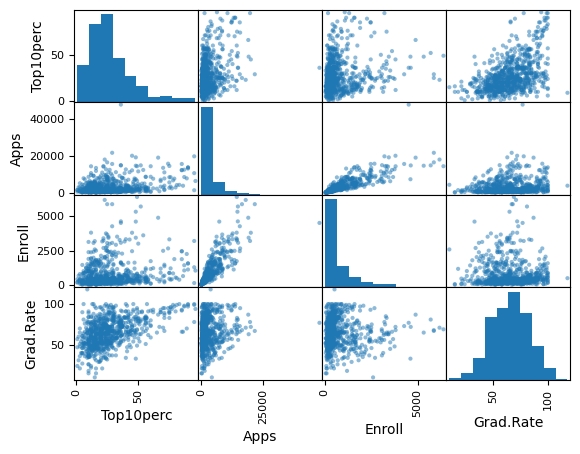

In [92]:
pd.plotting.scatter_matrix(college[[
    "Top10perc", 
    "Apps", 
    "Enroll",
    "Grad.Rate"
]]);

In [93]:
college.corr()

Private      Apps    Accept    Enroll  Top10perc  Top25perc  \
Private      1.000000 -0.432095 -0.475252 -0.567908   0.164132   0.095752   
Apps        -0.432095  1.000000  0.943451  0.846822   0.338834   0.351640   
Accept      -0.475252  0.943451  1.000000  0.911637   0.192447   0.247476   
Enroll      -0.567908  0.846822  0.911637  1.000000   0.181294   0.226745   
Top10perc    0.164132  0.338834  0.192447  0.181294   1.000000   0.891995   
Top25perc    0.095752  0.351640  0.247476  0.226745   0.891995   1.000000   
F.Undergrad -0.615561  0.814491  0.874223  0.964640   0.141289   0.199445   
P.Undergrad -0.452088  0.398264  0.441271  0.513069  -0.105356  -0.053577   
Outstate     0.552650  0.050159 -0.025755 -0.155477   0.562331   0.489394   
Room.Board   0.340532  0.164939  0.090899 -0.040232   0.371480   0.331490   
Books       -0.018549  0.132559  0.113525  0.112711   0.118858   0.115527   
Personal    -0.304485  0.178731  0.200989  0.280929  -0.093316  -0.080810   
PhD         -0.156714  0.390697  0.355758  0.331469   0.531828   0.545862   
Terminal    -0.129620  0.369491  0.337583  0.308274   0.491135   0.524749   
S.F.Ratio   -0.472205  0.095633  0.176229  0.237271  -0.384875  -0.294629   
perc.alumni  0.414775 -0.090226 -0.159990 -0.180794   0.455485   0.417864   
Expend       0.258461  0.259592  0.124717  0.064169   0.660913   0.527447   
Grad.Rate    0.336162  0.146755  0.067313 -0.022341   0.494989   0.477281   

             F.Undergrad  P.Undergrad  Outstate  Room.Board     Books  \
Private        -0.615561    -0.452088  0.552650    0.340532 -0.018549   
Apps            0.814491     0.398264  0.050159    0.164939  0.132559   
Accept          0.874223     0.441271 -0.025755    0.090899  0.113525   
Enroll          0.964640     0.513069 -0.155477   -0.040232  0.112711   
Top10perc       0.141289    -0.105356  0.562331    0.371480  0.118858   
Top25perc       0.199445    -0.053577  0.489394    0.331490  0.115527   
F.Undergrad     1.000000     0.570512 -0.215742   -0.068890  0.115550   
P.Undergrad     0.570512     1.000000 -0.253512   -0.061326  0.081200   
Outstate       -0.215742    -0.253512  1.000000    0.654256  0.038855   
Room.Board     -0.068890    -0.061326  0.654256    1.000000  0.127963   
Books           0.115550     0.081200  0.038855    0.127963  1.000000   
Personal        0.317200     0.319882 -0.299087   -0.199428  0.179295   
PhD             0.318337     0.149114  0.382982    0.329202  0.026906   
Terminal        0.300019     0.141904  0.407983    0.374540  0.099955   
S.F.Ratio       0.279703     0.232531 -0.554821   -0.362628 -0.031929   
perc.alumni    -0.229462    -0.280792  0.566262    0.272363 -0.040208   
Expend          0.018652    -0.083568  0.672779    0.501739  0.112409   
Grad.Rate      -0.078773    -0.257001  0.571290    0.424942  0.001061   

             Personal       PhD  Terminal  S.F.Ratio  perc.alumni    Expend  \
Private     -0.304485 -0.156714 -0.129620  -0.472205     0.414775  0.258461   
Apps         0.178731  0.390697  0.369491   0.095633    -0.090226  0.259592   
Accept       0.200989  0.355758  0.337583   0.176229    -0.159990  0.124717   
Enroll       0.280929  0.331469  0.308274   0.237271    -0.180794  0.064169   
Top10perc   -0.093316  0.531828  0.491135  -0.384875     0.455485  0.660913   
Top25perc   -0.080810  0.545862  0.524749  -0.294629     0.417864  0.527447   
F.Undergrad  0.317200  0.318337  0.300019   0.279703    -0.229462  0.018652   
P.Undergrad  0.319882  0.149114  0.141904   0.232531    -0.280792 -0.083568   
Outstate    -0.299087  0.382982  0.407983  -0.554821     0.566262  0.672779   
Room.Board  -0.199428  0.329202  0.374540  -0.362628     0.272363  0.501739   
Books        0.179295  0.026906  0.099955  -0.031929    -0.040208  0.112409   
Personal     1.000000 -0.010936 -0.030613   0.136345    -0.285968 -0.097892   
PhD         -0.010936  1.000000  0.849587  -0.130530     0.249009  0.432762   
Terminal    -0.030613  0.849587  1.000000  -0.160104    

In [94]:
college.corr()["Grad.Rate"].abs() > 0.4

Private        False
Apps           False
Accept         False
Enroll         False
Top10perc       True
Top25perc       True
F.Undergrad    False
P.Undergrad    False
Outstate        True
Room.Board      True
Books          False
Personal       False
PhD            False
Terminal       False
S.F.Ratio      False
perc.alumni     True
Expend         False
Grad.Rate       True
Name: Grad.Rate, dtype: bool

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<Axes: >

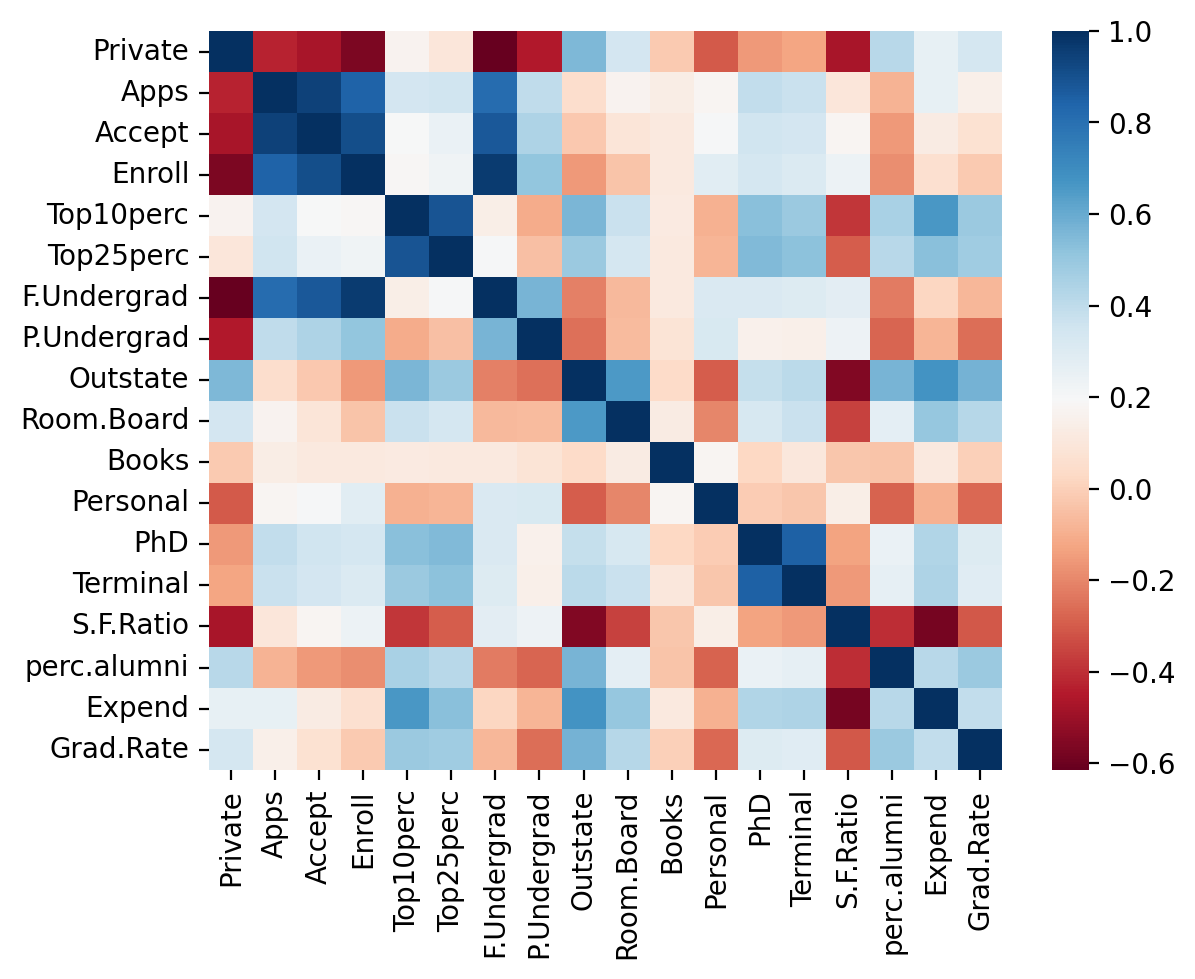

In [96]:
plt.figure(dpi=200)
sns.heatmap(college.corr(), ax=plt.gca(), cmap="RdBu")

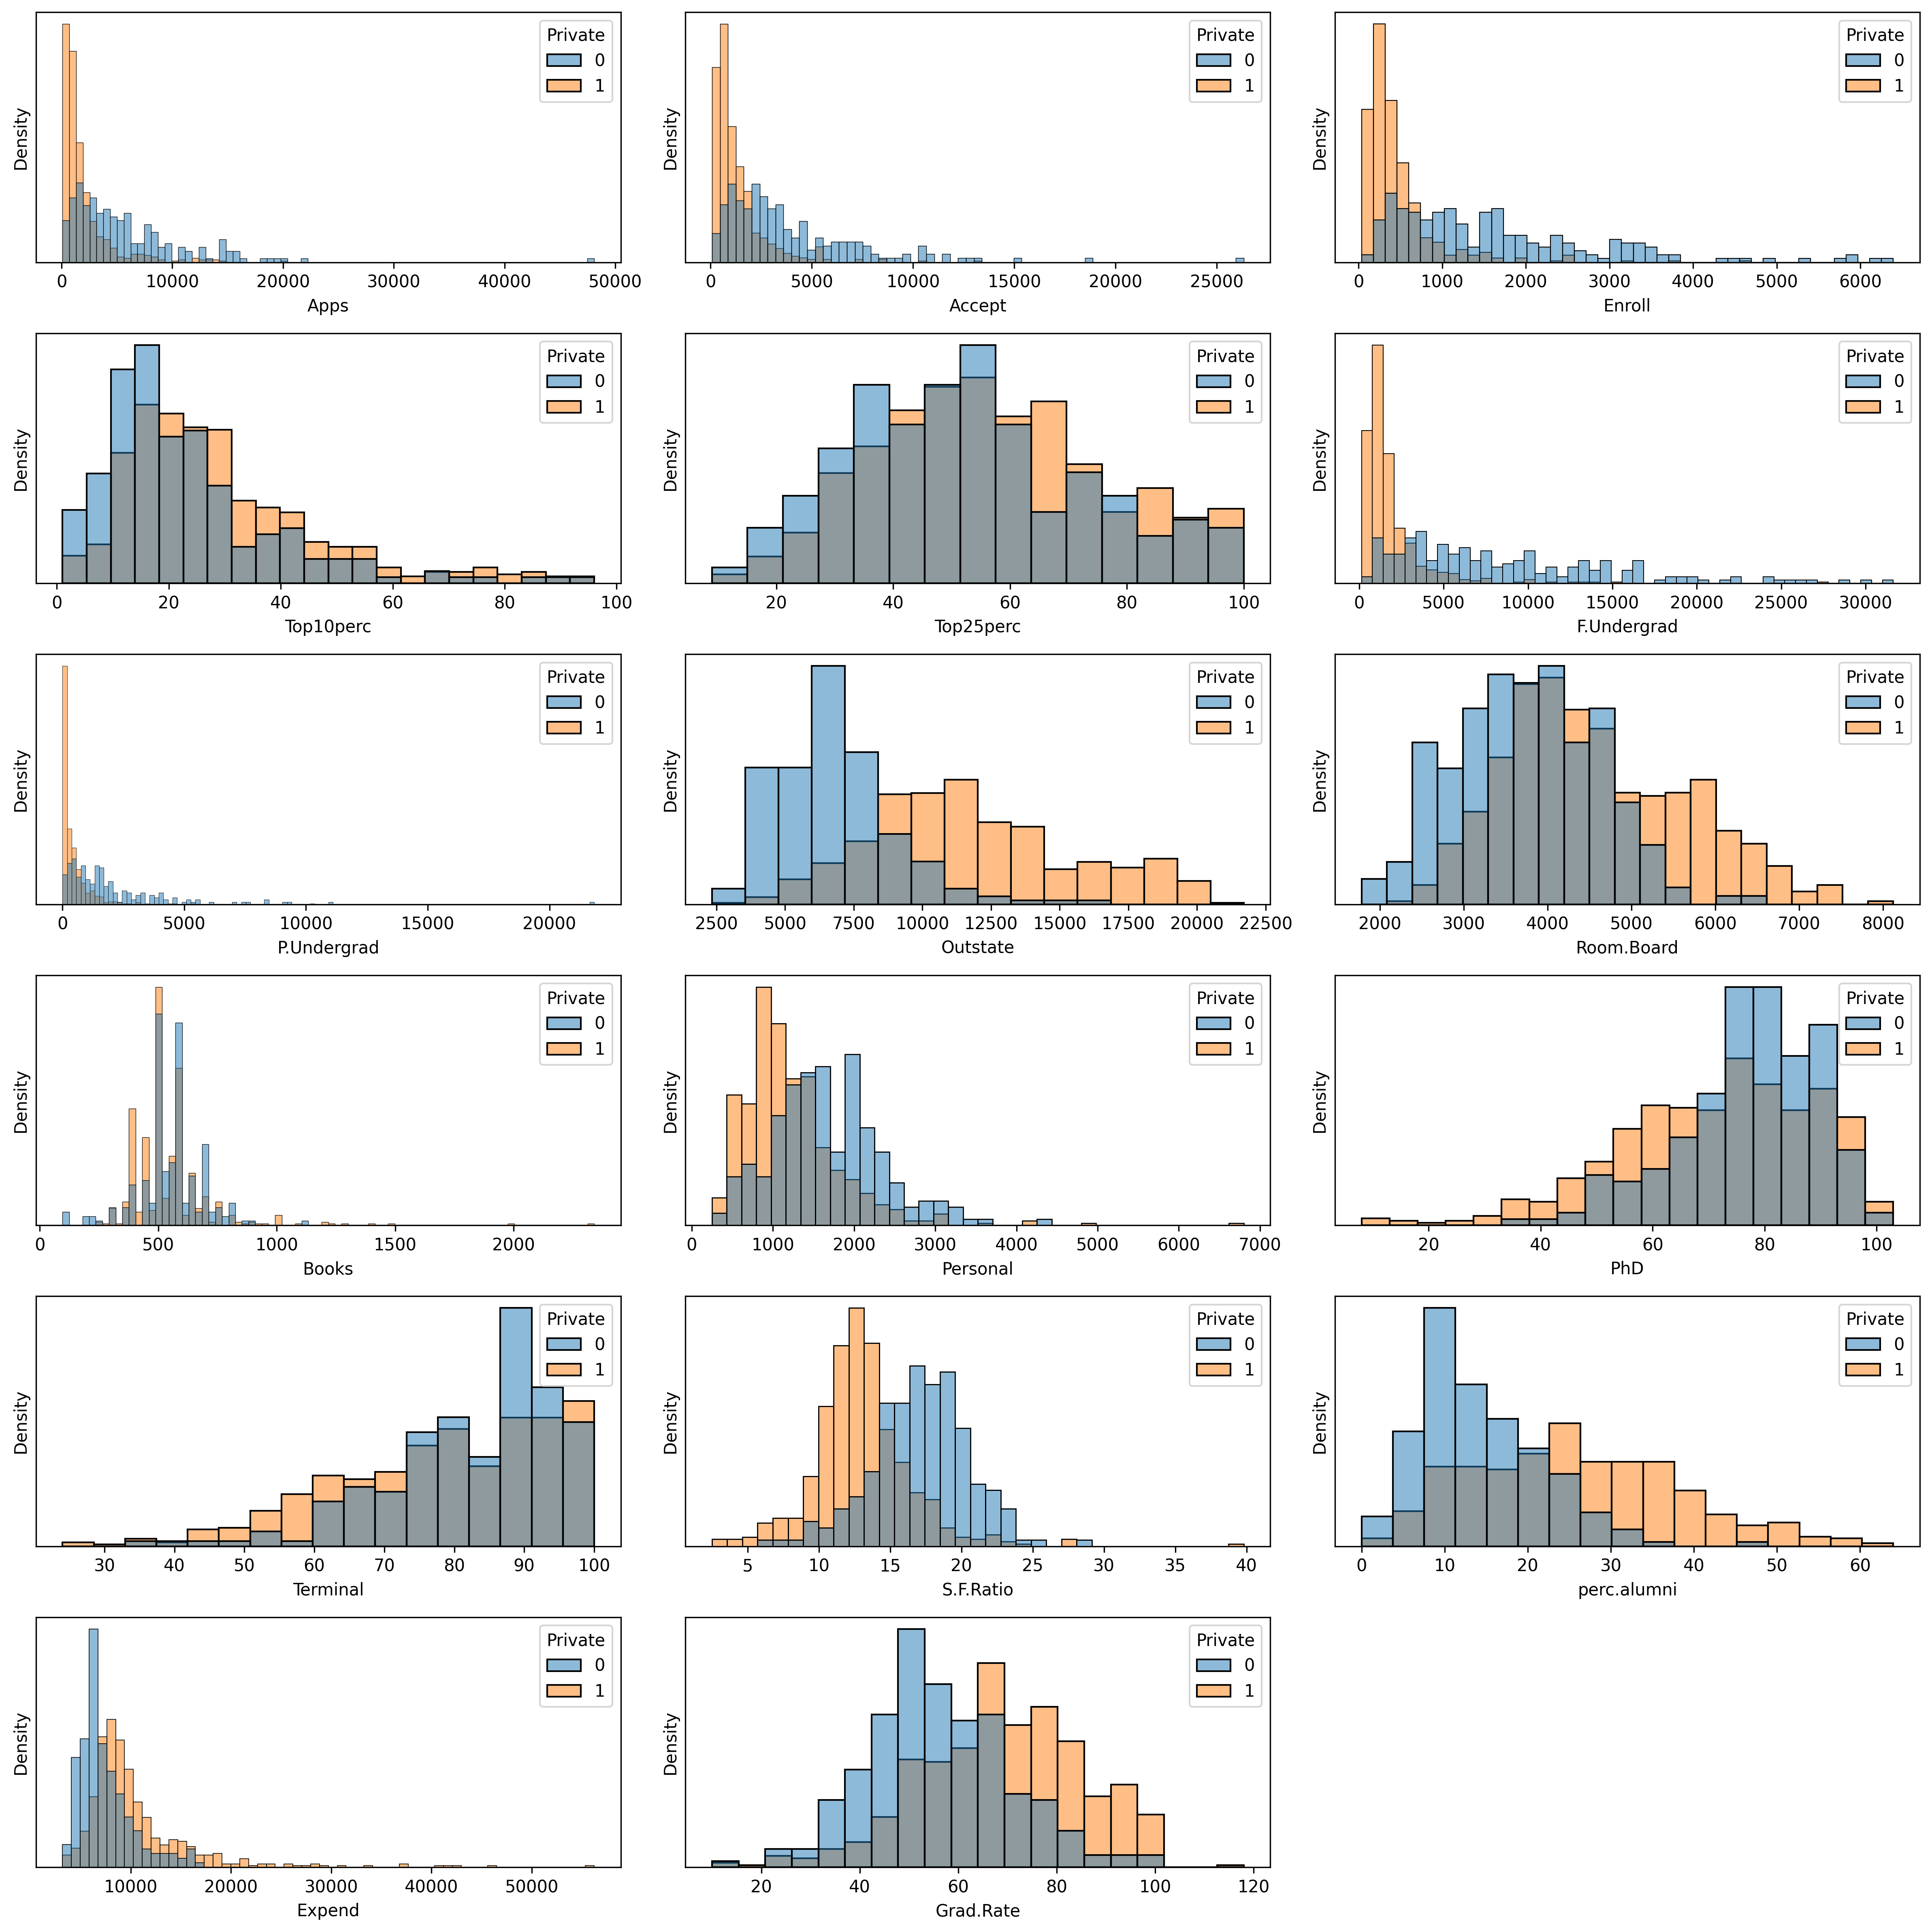

In [97]:
from typing import List
from matplotlib.axes import Axes

fig, axs = plt.subplots(6, 3, figsize=(16, 16), dpi=300)
axs: List[Axes] = axs.flatten()

for (idx, col) in enumerate(college.columns[1:]):
    sns.histplot(data=college, x=col, hue='Private', stat='density', common_norm=False, ax=axs[idx])
    axs[idx].set_yticks([])
    # if college[col].max() > 100 * college[col].min():
    #     axs[idx].semilogy()
axs[-1].axis("off")

plt.tight_layout()

In [98]:
def clip_graduate_rate(a: int):
    if a < 0:
        return 0
    elif a > 100:
        return 100
    else:
        return a

In [99]:
college["Grad.Rate"] = college["Grad.Rate"].apply(clip_graduate_rate)

In [100]:
def classify_graduate_slot(a: int) -> str:
    if a > 80:
        type_ = 4
    elif a > 60:
        type_ = 3
    elif a > 40:
        type_ = 2
    elif a > 20:
        type_ = 1
    else:
        type_ = 0
    return f"{(type_) * 20:>3d}-{(type_+1) * 20:>3d}%"


In [101]:
list(college["Grad.Rate"])

[60,
 56,
 54,
 59,
 15,
 55,
 63,
 73,
 80,
 52,
 73,
 76,
 74,
 68,
 55,
 69,
 100,
 59,
 46,
 34,
 48,
 70,
 65,
 48,
 54,
 48,
 88,
 69,
 58,
 71,
 69,
 71,
 48,
 65,
 85,
 71,
 79,
 91,
 72,
 72,
 73,
 84,
 52,
 49,
 69,
 46,
 58,
 55,
 82,
 63,
 48,
 56,
 35,
 58,
 72,
 51,
 75,
 53,
 58,
 72,
 96,
 67,
 46,
 85,
 84,
 49,
 18,
 58,
 82,
 33,
 97,
 89,
 93,
 78,
 83,
 71,
 55,
 60,
 59,
 61,
 81,
 63,
 49,
 64,
 83,
 52,
 91,
 74,
 79,
 67,
 62,
 67,
 79,
 55,
 75,
 100,
 74,
 64,
 24,
 66,
 47,
 67,
 49,
 50,
 51,
 58,
 74,
 47,
 52,
 73,
 58,
 63,
 48,
 21,
 87,
 79,
 74,
 77,
 73,
 46,
 67,
 75,
 91,
 93,
 96,
 51,
 100,
 83,
 43,
 75,
 72,
 77,
 78,
 64,
 80,
 76,
 72,
 95,
 93,
 69,
 84,
 59,
 37,
 76,
 99,
 45,
 42,
 55,
 75,
 91,
 75,
 64,
 85,
 51,
 63,
 46,
 54,
 72,
 98,
 94,
 56,
 58,
 81,
 82,
 87,
 46,
 61,
 60,
 54,
 87,
 42,
 77,
 83,
 67,
 97,
 78,
 58,
 42,
 38,
 54,
 50,
 76,
 82,
 70,
 59,
 81,
 64,
 86,
 63,
 44,
 82,
 96,
 50,
 67,
 53,
 68,
 94,
 24,
 22,
 6

In [102]:
college["graduate_slot"] = college["Grad.Rate"].apply(classify_graduate_slot)

In [103]:
set(college["graduate_slot"])

{'  0- 20%', ' 20- 40%', ' 40- 60%', ' 60- 80%', ' 80-100%'}

In [104]:
# Top10perc       True
# Top25perc       True
# Outstate        True
# Room.Board      True
# perc.alumni     True
# Grad.Rate       True

In [105]:
college_distilled = college[["Private", "Top10perc", "Outstate", "Room.Board", "perc.alumni", "graduate_slot", "Apps"]]

In [106]:
college_distilled["Outstate/250"] = college_distilled["Outstate"] / 250
college_distilled["Room.Board/80"] = college_distilled["Room.Board"] / 80
college_distilled["Apps/500"] = college_distilled["Apps"] / 500

college_distilled.drop(columns=["Outstate", "Room.Board", "Apps"], inplace=True)

In [107]:
from collections import Counter

Counter(college_distilled["Private"])

Counter({1: 565, 0: 212})

In [108]:
weights = college_distilled["Private"].map({1: 0.273, 0:0.727})

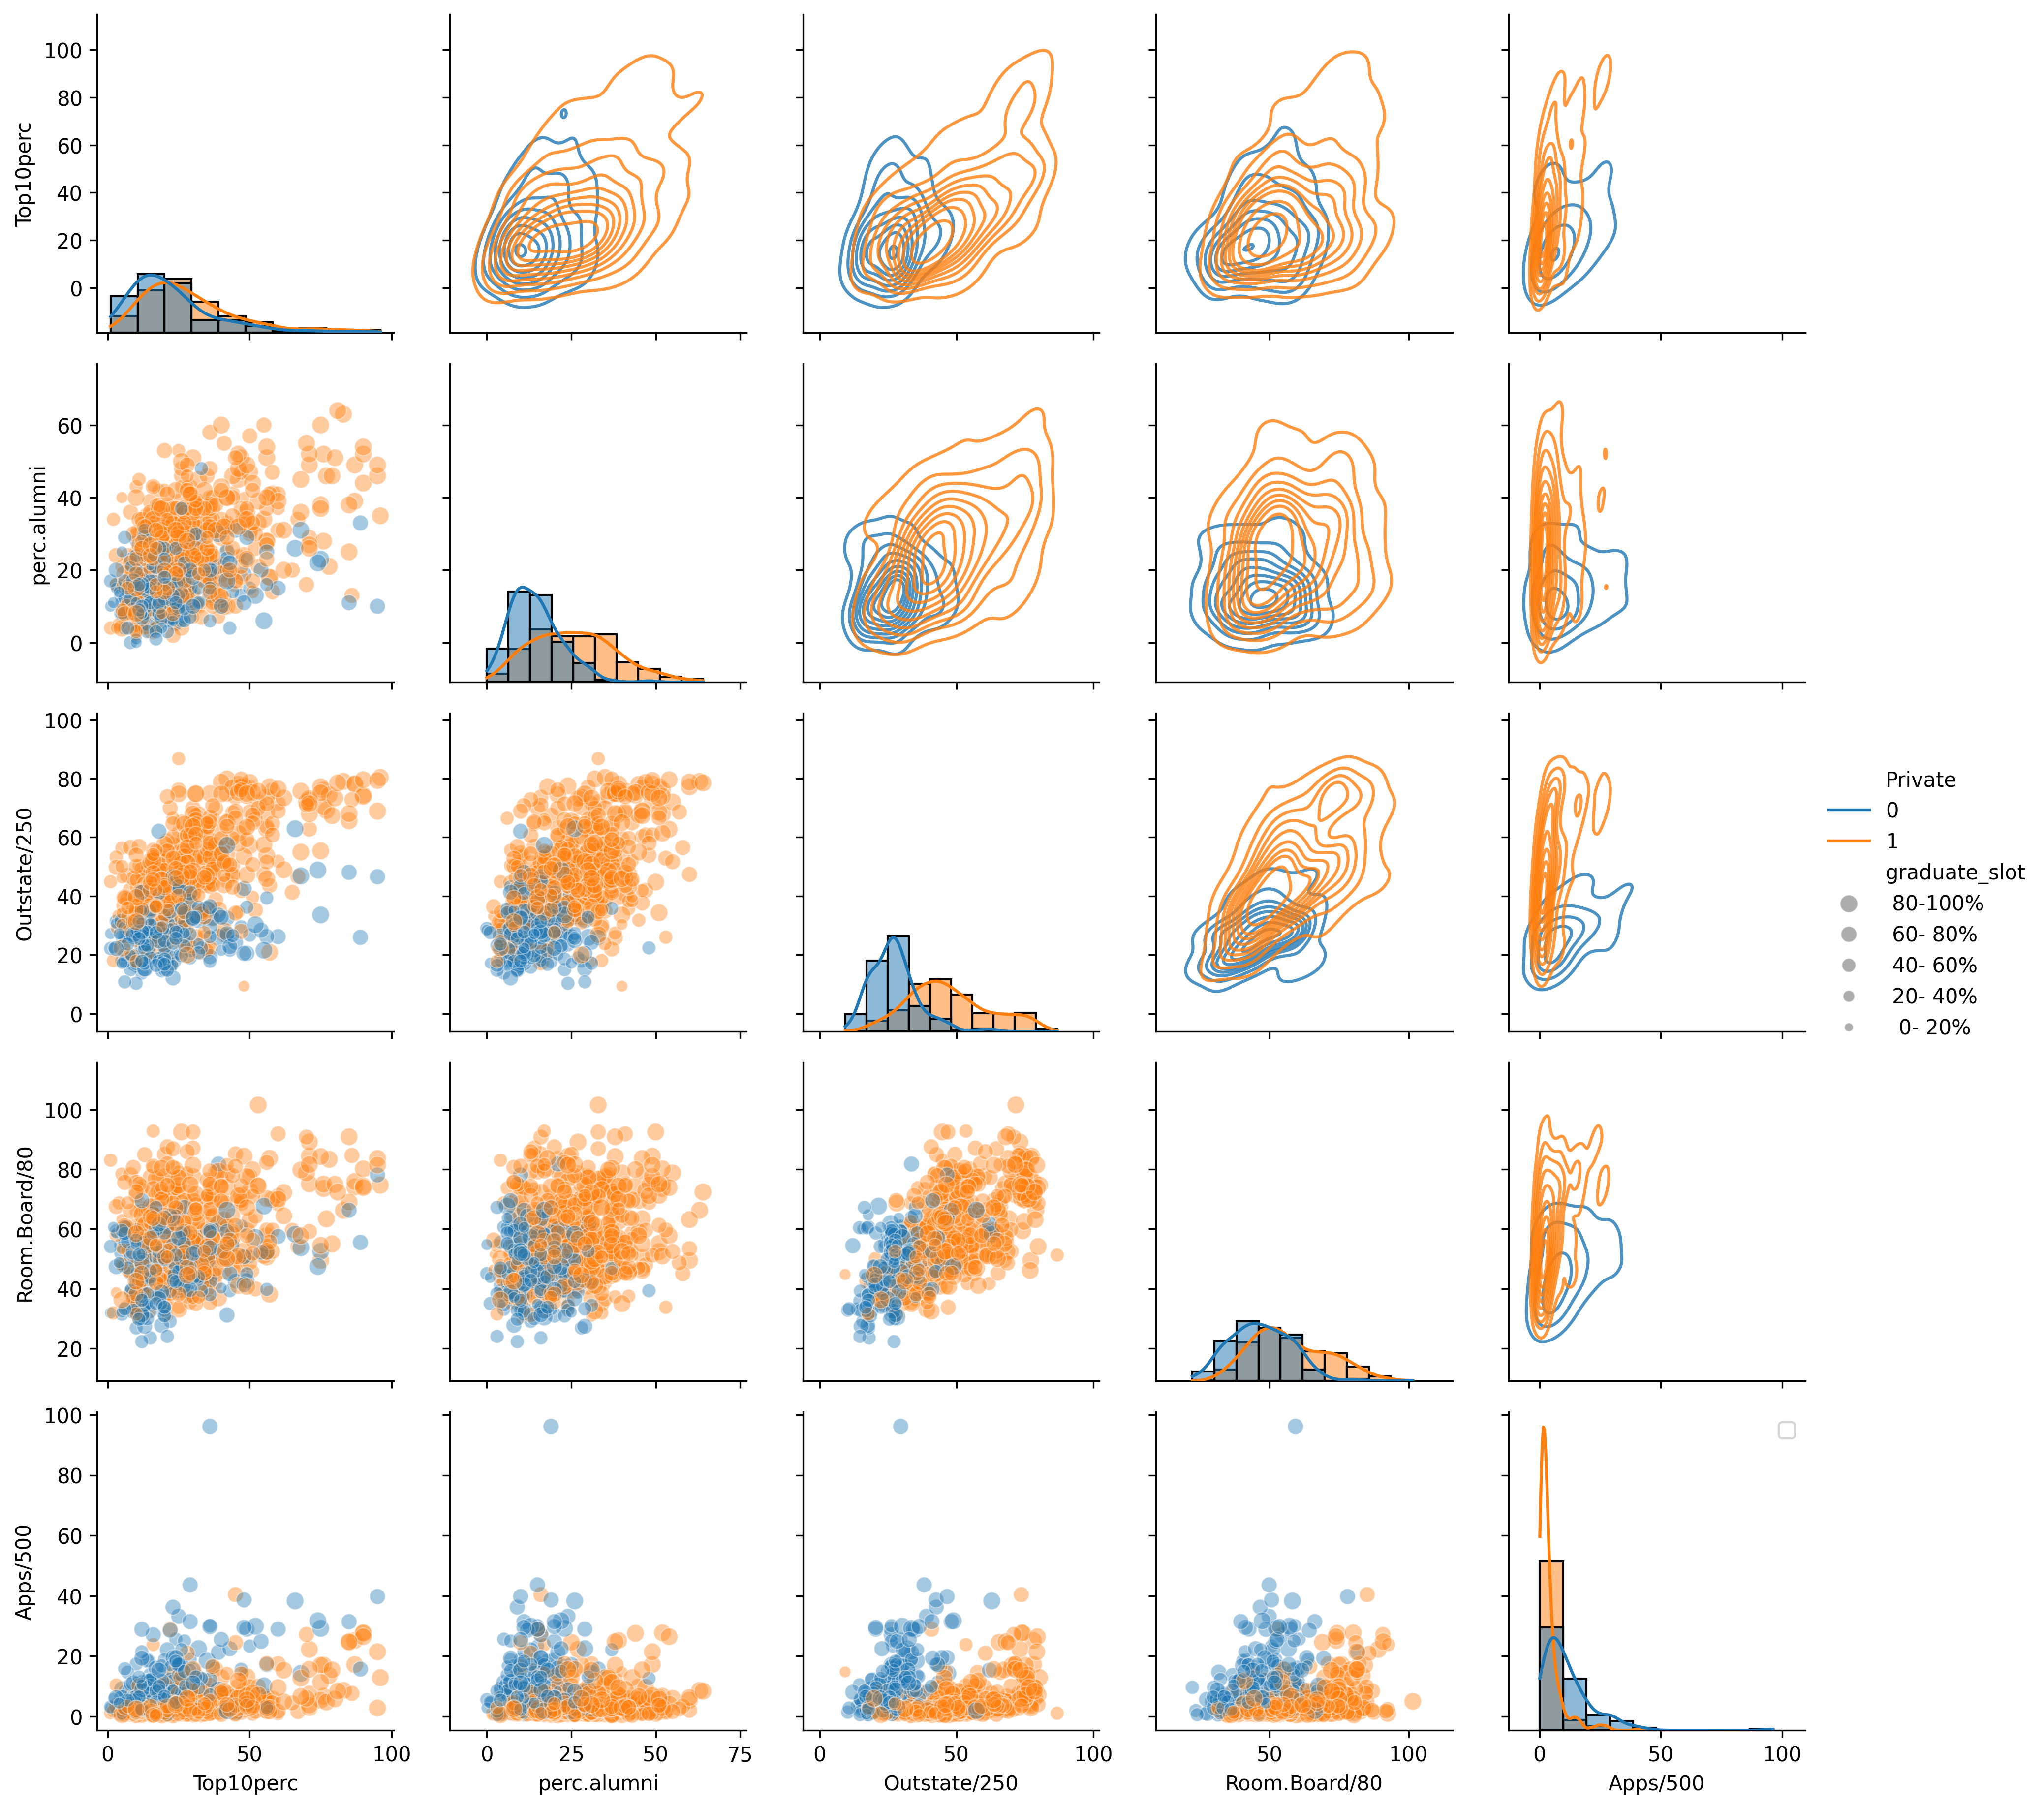

In [109]:
from functools import partial
import warnings

warnings.filterwarnings("ignore")

g = sns.PairGrid(college_distilled, hue="Private");

plt.legend()

plt.gcf().set_dpi(300)

g.map_diag(partial(sns.histplot, stat="density", weights=weights, kde=True));
g.map_lower(sns.scatterplot, 
            size=college_distilled["graduate_slot"], 
            size_order=['  0- 20%', ' 20- 40%', ' 40- 60%', ' 60- 80%', ' 80-100%'][::-1], 
            alpha=0.4);
g.map_upper(sns.kdeplot, alpha=0.8);
g.add_legend(title="", adjust_subtitles=True);

# 正态性检验


In [110]:
from scipy.stats import kstest

for col in college.columns[:-1]:
    kstest_result = kstest(college[col], cdf="norm")
    print(f"[ {col} ], [{kstest_result.statistic:.2f}], [ {kstest_result.pvalue:.4f} ], ")

[ Private ], [0.57], [ 0.0000 ], 
[ Apps ], [1.00], [ 0.0000 ], 
[ Accept ], [1.00], [ 0.0000 ], 
[ Enroll ], [1.00], [ 0.0000 ], 
[ Top10perc ], [0.99], [ 0.0000 ], 
[ Top25perc ], [1.00], [ 0.0000 ], 
[ F.Undergrad ], [1.00], [ 0.0000 ], 
[ P.Undergrad ], [0.99], [ 0.0000 ], 
[ Outstate ], [1.00], [ 0.0000 ], 
[ Room.Board ], [1.00], [ 0.0000 ], 
[ Books ], [1.00], [ 0.0000 ], 
[ Personal ], [1.00], [ 0.0000 ], 
[ PhD ], [1.00], [ 0.0000 ], 
[ Terminal ], [1.00], [ 0.0000 ], 
[ S.F.Ratio ], [1.00], [ 0.0000 ], 
[ perc.alumni ], [0.99], [ 0.0000 ], 
[ Expend ], [1.00], [ 0.0000 ], 
[ Grad.Rate ], [1.00], [ 0.0000 ], 


# 多重共线性检测

In [111]:
for c in college.columns:
    print(college[c].dtype)

int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
float64
int64
int64
int64
object


In [112]:
# perform VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(df: pd.DataFrame) -> pd.DataFrame:
    vif_ = pd.DataFrame()
    vif_['index'] = df.columns
    vif_['VIF'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return vif_

college_dvif = college.drop(columns=["Apps", "graduate_slot"]).copy(deep=True).astype(float)
vif = get_vif(college_dvif)
vif

# one can see that there are in the feature columns there are features have high VIF values

index         VIF
0       Private    8.963558
1        Accept   11.735339
2        Enroll   36.170512
3     Top10perc   22.209075
4     Top25perc   48.670016
5   F.Undergrad   28.458218
6   P.Undergrad    2.255459
7      Outstate   32.424515
8    Room.Board   32.845180
9         Books   12.834190
10     Personal    5.881687
11          PhD   85.447864
12     Terminal  114.656719
13    S.F.Ratio   16.138951
14  perc.alumni    8.073576
15       Expend   12.544716
16    Grad.Rate   27.177231

In [113]:
ls = []

while True:
    vif = get_vif(college_dvif.drop(columns=list(set(ls).intersection(college_dvif.columns))))
    ls = list(vif[vif["VIF"] > 20]["index"])
    
    print(vif, end="\n\n")
    
    if len(ls) == 0:
        break

          index         VIF
0       Private    8.963558
1        Accept   11.735339
2        Enroll   36.170512
3     Top10perc   22.209075
4     Top25perc   48.670016
5   F.Undergrad   28.458218
6   P.Undergrad    2.255459
7      Outstate   32.424515
8    Room.Board   32.845180
9         Books   12.834190
10     Personal    5.881687
11          PhD   85.447864
12     Terminal  114.656719
13    S.F.Ratio   16.138951
14  perc.alumni    8.073576
15       Expend   12.544716
16    Grad.Rate   27.177231

         index        VIF
0      Private   5.584236
1       Accept   2.629918
2  P.Undergrad   1.896823
3        Books  11.574623
4     Personal   5.524072
5    S.F.Ratio   8.674088
6  perc.alumni   5.977002
7       Expend   6.547904



# 多元线性回归

In [131]:
from sklearn.model_selection import train_test_split

college["logApps"] = np.log(college["Apps"] + 1e-5)

X,  y = college.drop(columns=["graduate_slot", "Apps", "logApps", "Accept", "Enroll", "F.Undergrad", "P.Undergrad"]), college["logApps"]
X_columns = X.columns

In [132]:
X_columns

Index(['Private', 'Top10perc', 'Top25perc', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

In [133]:
# normalize fields
from sklearn.preprocessing import MaxAbsScaler

max_abs_scalar = MaxAbsScaler()

X = max_abs_scalar.fit_transform(X)
print(*max_abs_scalar.max_abs_, sep='\t')

1.0	96.0	100.0	21700.0	8124.0	2340.0	6800.0	103.0	100.0	39.8	64.0	56233.0	100.0


In [134]:
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.3, random_state=42)

In [135]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error

models: LinearRegression|Ridge|Lasso|ElasticNet = [
    LinearRegression(),
    Ridge(alpha=1e-2),
    Lasso(alpha=1e-3),
    ElasticNet(alpha=1e-3, l1_ratio=0.5),
]

for model in models:
    model = model.fit(X_train, y_train)
    yhat = model.predict(X_test)
    
    r2, mse = r2_score(y_test, yhat), mean_squared_error(y_test, yhat)
    
    print(f"{model.__class__.__name__:>20}, {r2:.2f}, {mse:.2f}")

    LinearRegression, 0.57, 0.52
               Ridge, 0.57, 0.52
               Lasso, 0.56, 0.52
          ElasticNet, 0.56, 0.52


In [136]:
[model.intercept_] + list(model.coef_)

[4.370956670625539,
 -1.3529423009706891,
 0.0,
 1.094932138615936,
 0.7927889894276564,
 1.028736400917638,
 0.9773802324379265,
 0.861882448363494,
 0.9708227128808661,
 0.1318315536736659,
 1.3856789188887515,
 -0.6810536756165407,
 1.3773847663811787,
 1.2442195038346924]

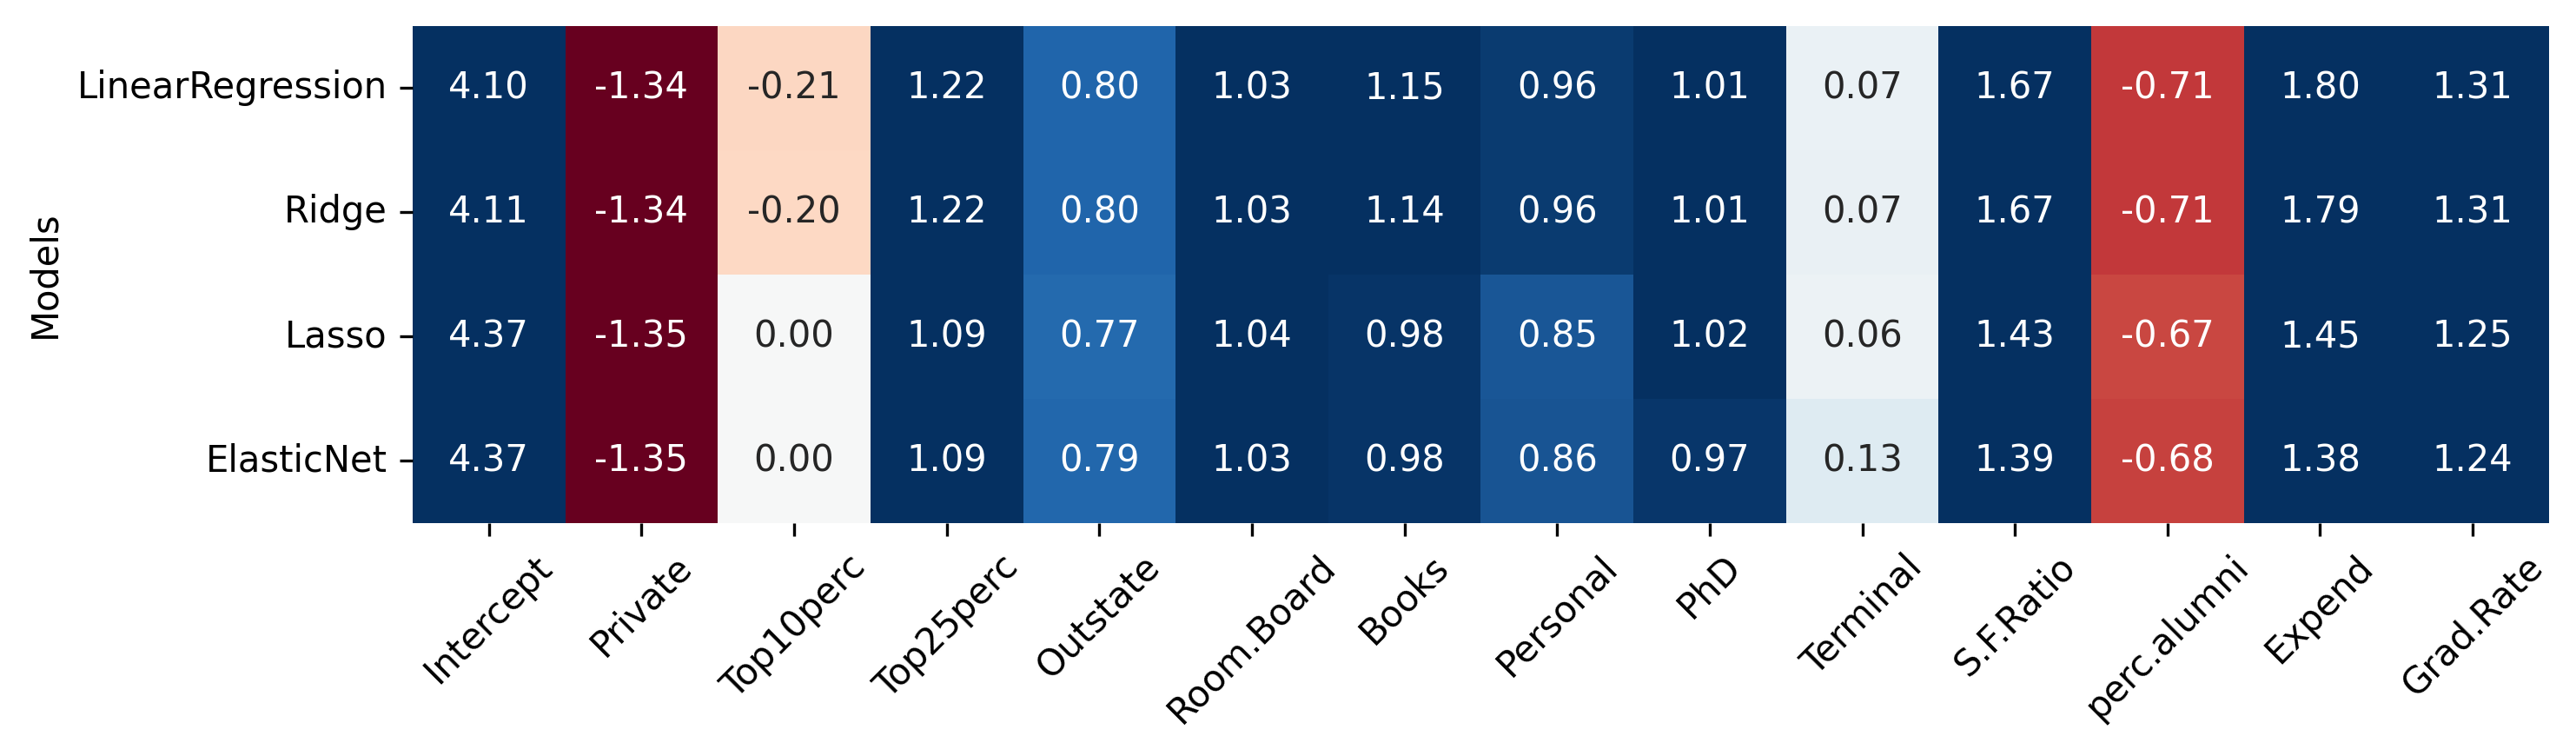

In [137]:
plt.figure(dpi=300, figsize=(10, 3))

ax = plt.subplot(1, 1, 1)
sns.heatmap(np.stack([[i.intercept_] + list(i.coef_) for i in models]), annot=True, fmt=".2f", cmap="RdBu", vmin=-1, vmax=1, cbar=False, ax=ax)
ax.set_xticks(np.arange(len(X_columns) + 1)+0.5, ["Intercept"] + list(X_columns), rotation=45)
ax.set_ylabel("Models")
ax.set_yticks(np.arange(4)+0.5, [i.__class__.__name__ for i in models], rotation=0)

plt.tight_layout()

In [124]:
# Tree-based and Random forest with parameter search

from sklearn.tree import DecisionTreeRegressor, plot_tree

reg = DecisionTreeRegressor(criterion="squared_error", max_depth=2, min_samples_split=10)

reg.fit(X_train, y_train)
yhat = reg.predict(X_test)

print(r2_score(y_test, yhat), mean_squared_error(y_test, yhat))

0.7160775542759642 0.34081725017309544


In [138]:
# search paramms
import optuna

def objective(trial: optuna.trial.Trial):
    params = {
        # 固定项
        'criterion': 'squared_error',          # 也可放进搜索空间
        'splitter': 'best',                    # 也可放进搜索空间
        'random_state': 42,

        # Optuna 搜索空间
        'max_depth': trial.suggest_int('max_depth', 2, 3),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 30),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'min_weight_fraction_leaf': trial.suggest_float('min_weight_fraction_leaf', 0.0, 0.5, step=0.05),
        'max_features': trial.suggest_categorical(
            'max_features', ['sqrt', 'log2', None]
        ),
        'max_leaf_nodes': trial.suggest_int('max_leaf_nodes', 10, 1000, log=True),
        'min_impurity_decrease': trial.suggest_float('min_impurity_decrease', 0.0, 0.1, step=0.001),
        'ccp_alpha': trial.suggest_float('ccp_alpha', 0.0, 0.05, step=0.001),
    }
    
    model = DecisionTreeRegressor(**params)
    model.fit(X_train, y_train)
    
    yhat = model.predict(X_test)
    
    return mean_squared_error(y_test, yhat)

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=1500, show_progress_bar=True)


[I 2025-11-13 23:32:51,419] A new study created in memory with name: no-name-ba57a23c-a410-4d21-aaf7-ab3c5b0d7ebe


  0%|          | 0/1500 [00:00<?, ?it/s]

[I 2025-11-13 23:32:51,434] Trial 0 finished with value: 0.9597724182641344 and parameters: {'max_depth': 3, 'min_samples_split': 29, 'min_samples_leaf': 16, 'min_weight_fraction_leaf': 0.30000000000000004, 'max_features': None, 'max_leaf_nodes': 223, 'min_impurity_decrease': 0.04, 'ccp_alpha': 0.008}. Best is trial 0 with value: 0.9597724182641344.
[I 2025-11-13 23:32:51,439] Trial 1 finished with value: 1.2013301842407313 and parameters: {'max_depth': 2, 'min_samples_split': 28, 'min_samples_leaf': 5, 'min_weight_fraction_leaf': 0.4, 'max_features': 'sqrt', 'max_leaf_nodes': 23, 'min_impurity_decrease': 0.092, 'ccp_alpha': 0.047}. Best is trial 0 with value: 0.9597724182641344.
[I 2025-11-13 23:32:51,445] Trial 2 finished with value: 1.0045266895960168 and parameters: {'max_depth': 2, 'min_samples_split': 22, 'min_samples_leaf': 15, 'min_weight_fraction_leaf': 0.0, 'max_features': 'sqrt', 'max_leaf_nodes': 43, 'min_impurity_decrease': 0.059000000000000004, 'ccp_alpha': 0.037}. Best i

In [ ]:
reg = DecisionTreeRegressor(**study.best_params)
reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.006, max_depth=2, max_leaf_nodes=156,
                      min_impurity_decrease=0.058, min_samples_leaf=7,
                      min_samples_split=25, min_weight_fraction_leaf=0.2)

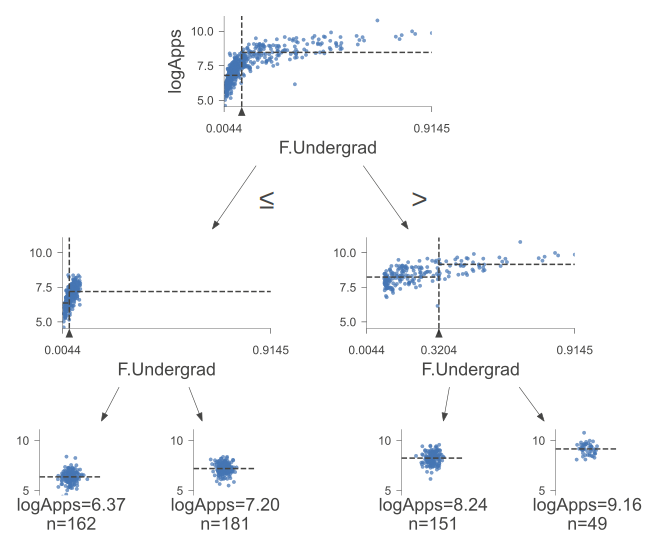

In [126]:
from dtreeviz import model

viz = model(reg, X_train=pd.DataFrame(X_train, columns=X_columns), y_train=y_train,
               target_name='logApps',
               feature_names=X_columns
               )   # 中文

viz.view(scale=2)

[Text(0.5, 0.8333333333333334, 'F.Undergrad <= 0.082\nsquared_error = 1.13\nsamples = 543\nvalue = 7.417'),
 Text(0.25, 0.5, 'F.Undergrad <= 0.033\nsquared_error = 0.482\nsamples = 343\nvalue = 6.805'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.347\nsamples = 162\nvalue = 6.367'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.278\nsamples = 181\nvalue = 7.196'),
 Text(0.75, 0.5, 'F.Undergrad <= 0.32\nsquared_error = 0.493\nsamples = 200\nvalue = 8.468'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.354\nsamples = 151\nvalue = 8.243'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.286\nsamples = 49\nvalue = 9.161')]

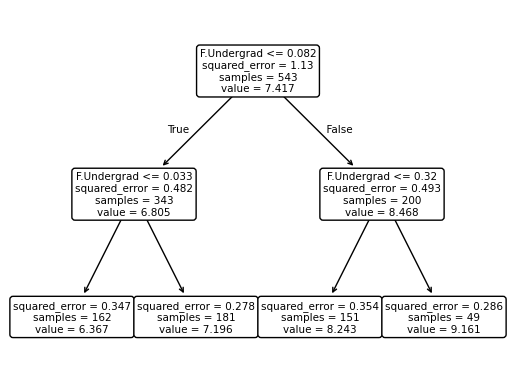

In [127]:
plot_tree(reg, rounded=True, feature_names=X_columns)

In [128]:
import shap

explainer = shap.TreeExplainer(reg)

In [129]:
shap_values = explainer(pd.DataFrame(X_train, columns=X_columns))

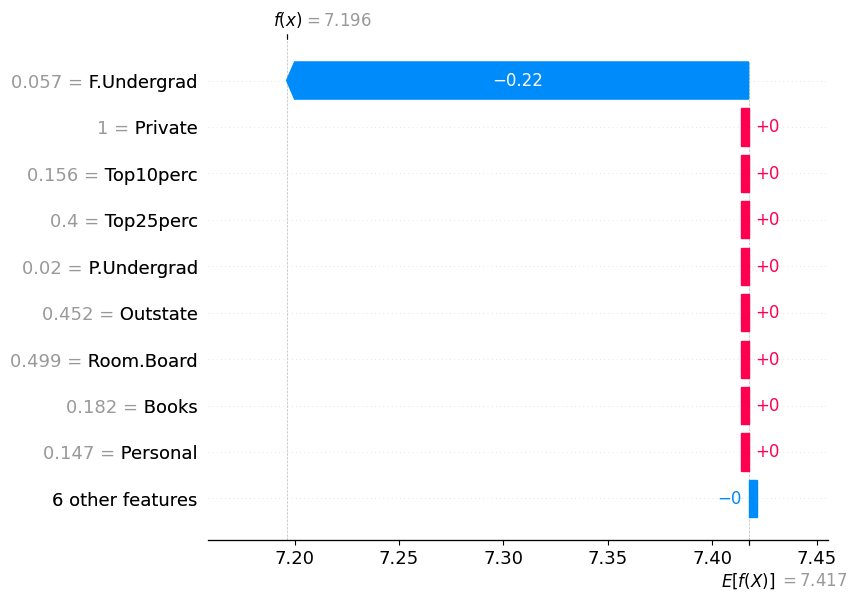

In [130]:
shap.plots.waterfall(shap_values[0])

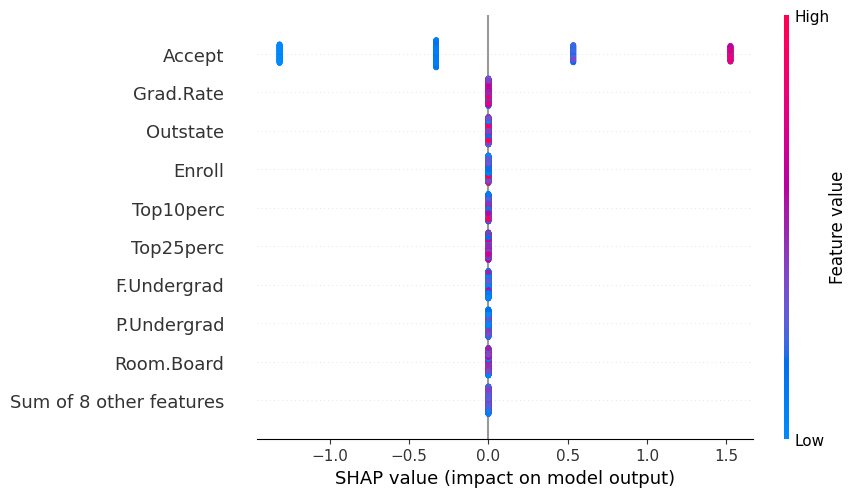

In [ ]:
shap.plots.beeswarm(shap_values)

In [ ]:
from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2).fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA

X_pca = PCA(n_components=2).fit_transform(X)

In [ ]:
college[["tsne_1", "tsne_2"]] = X_tsne
college[["pca_1", "pca_2"]] = X_pca

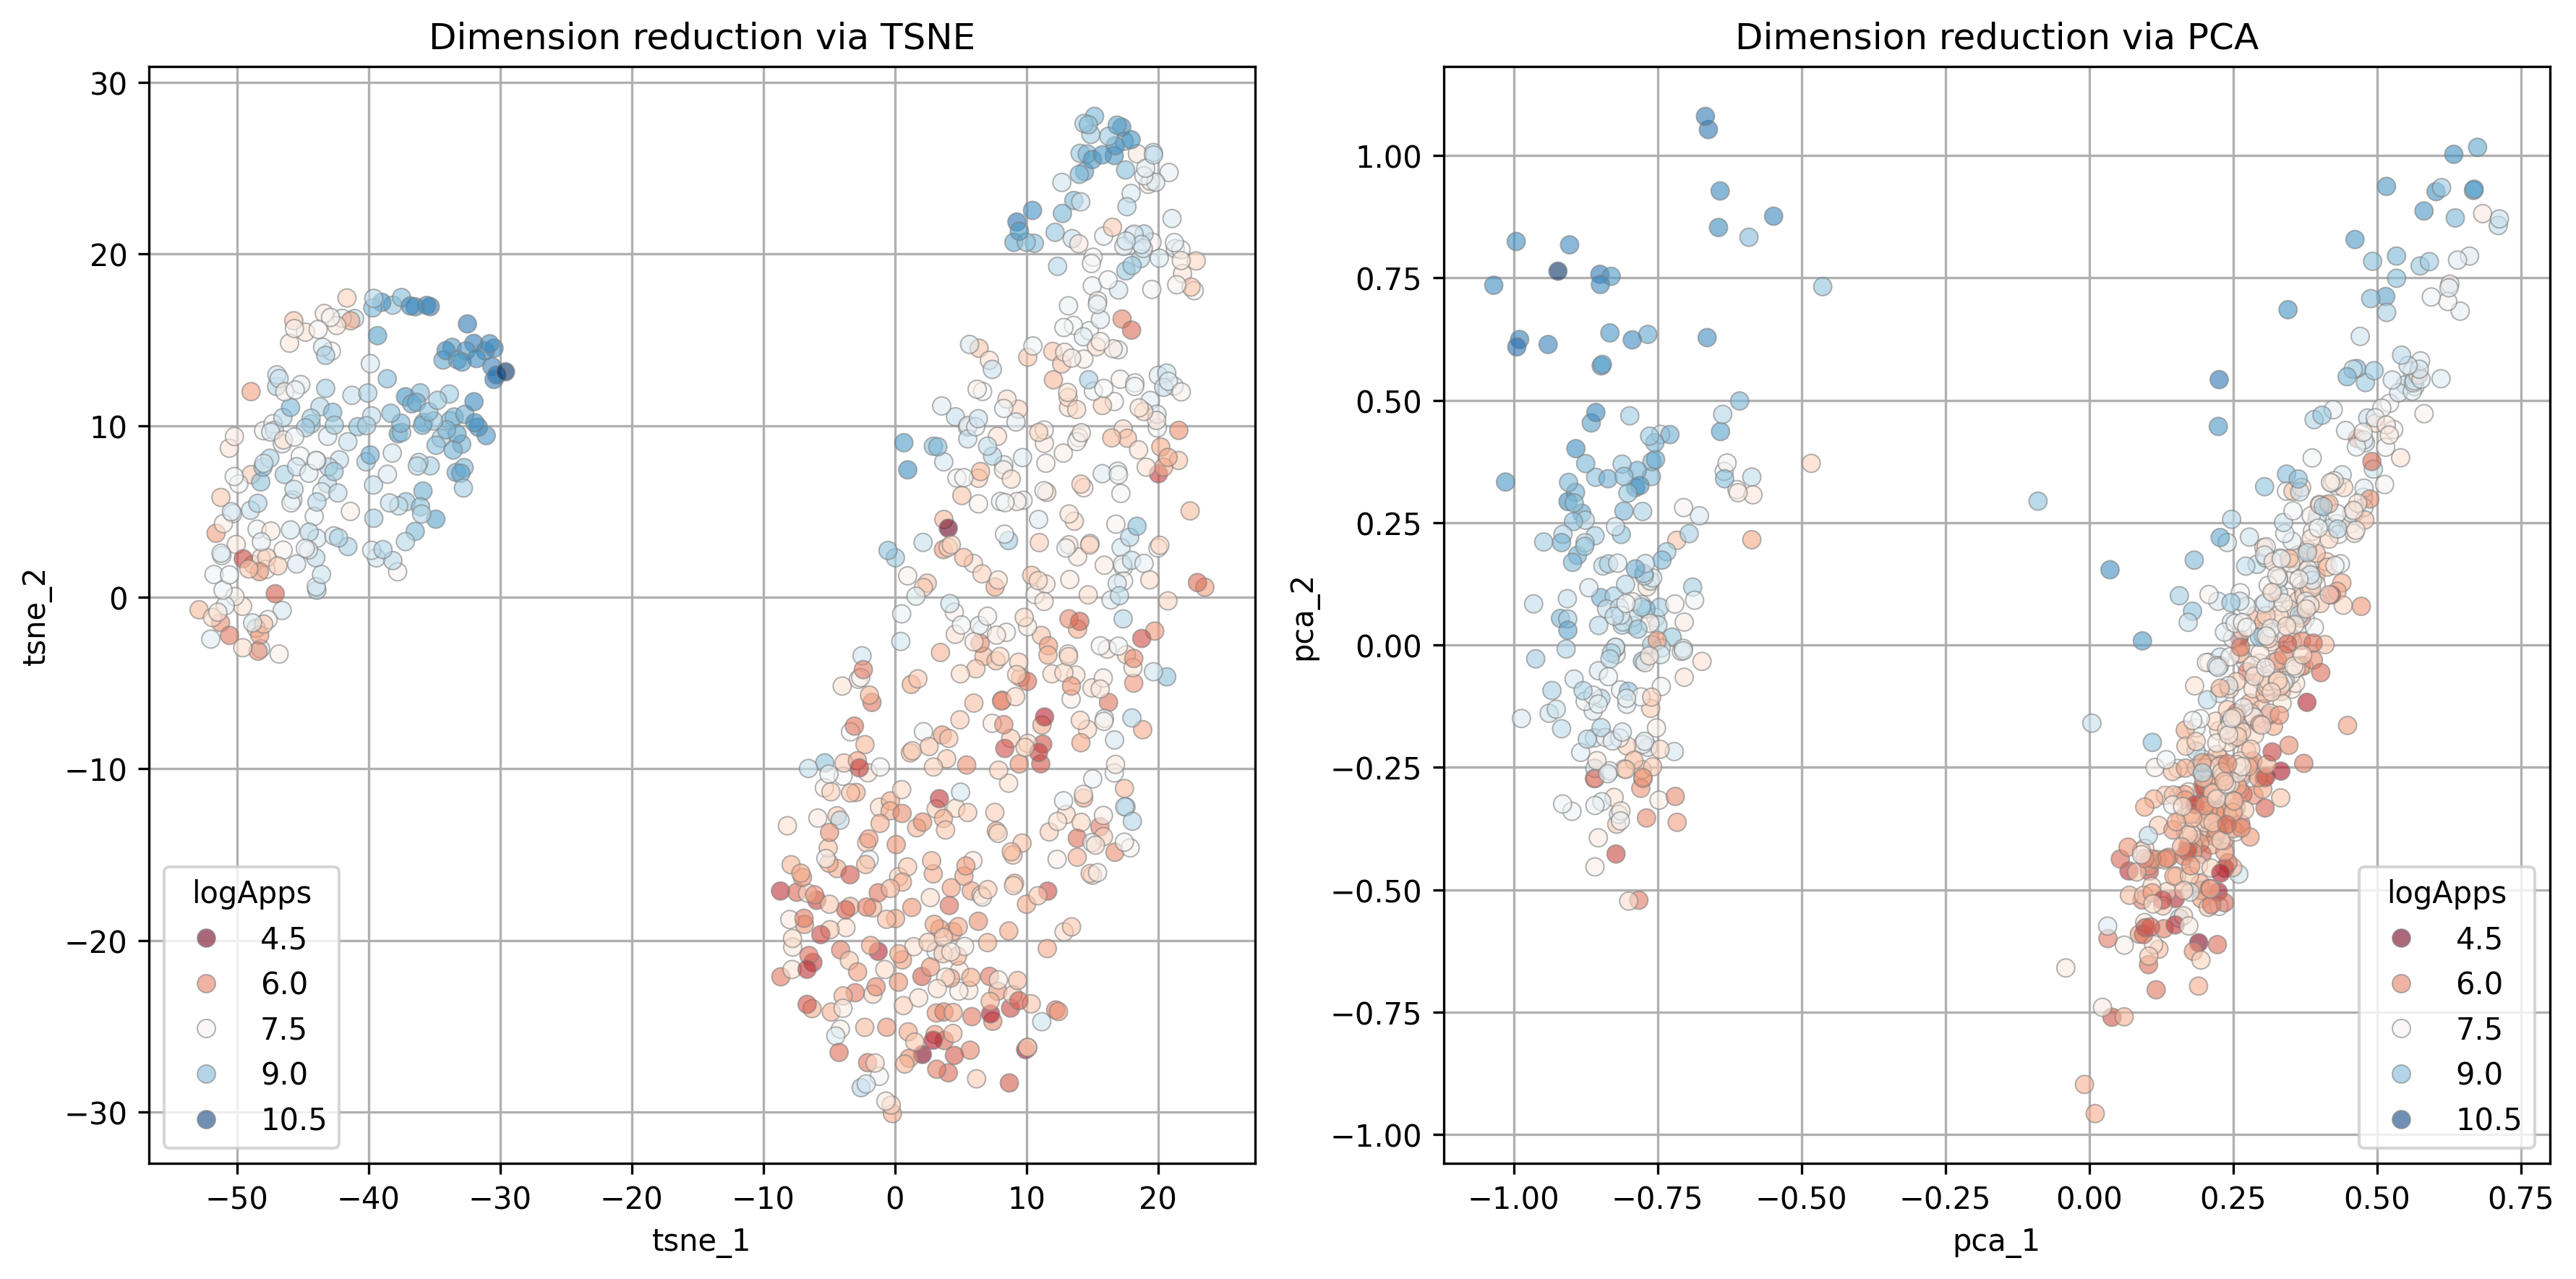

In [ ]:
plt.figure(dpi=300, figsize=(12, 6))

ax = plt.subplot(1, 2, 1)
sns.scatterplot(data=college, x="tsne_1", y="tsne_2", hue="logApps", palette="RdBu", edgecolor="gray", alpha=0.6, ax=ax, zorder=10)
ax.grid(zorder=0)
ax.set_title("Dimension reduction via TSNE")

ax = plt.subplot(1, 2, 2)
sns.scatterplot(data=college, x="pca_1", y="pca_2", hue="logApps", palette="RdBu", edgecolor="gray", alpha=0.6, ax=ax, zorder=10)
ax.grid(zorder=0)
ax.set_title("Dimension reduction via PCA")

plt.tight_layout()

In [ ]:
college.dtypes

Private            int64
Apps               int64
Accept             int64
Enroll             int64
Top10perc          int64
Top25perc          int64
F.Undergrad        int64
P.Undergrad        int64
Outstate           int64
Room.Board         int64
Books              int64
Personal           int64
PhD                int64
Terminal           int64
S.F.Ratio        float64
perc.alumni        int64
Expend             int64
Grad.Rate          int64
graduate_slot     object
logApps          float64
tsne_1           float32
tsne_2           float32
pca_1            float64
pca_2            float64
dtype: object